In [1]:
import numpy as np
import reboundx 
import rebound
from matplotlib import pyplot as plt




In [23]:
rp0 = 0.0207
e0 = 0.995
N = 1000

rp = np.linspace(0.0207, 0.028, N)
e = np.linspace(0.95, 0.999, N)
data = np.zeros((N, N))

for i, e0 in enumerate(e):
    for j, rp0 in enumerate(rp):
        


        sim = rebound.Simulation()
        sim.add(m=1)
        sim.add(m=9.5e-4, r=1.6*4.67e-4, a=rp0/(1-e0), e=e0, M=np.pi-1e-1)
        
        rebx = reboundx.Extras(sim)
        td = rebx.load_force("tides_dynamical")
        rebx.add_force(td)
        
        t = np.linspace(0, 5, 1000)
        
        for time in t:
            try:
                sim.integrate(time * 2 * np.pi)
                dE_alpha = sim.particles[1].params["td_dE_last"]
                #print("dE_alpha", dE_alpha)
                break
            except:
                pass
        EB0 = sim.energy()
        dc_tilde = (-dE_alpha / EB0)**0.5
        
        time_unit = (sim.G * sim.particles[1].m / (sim.particles[1].r)**3)**(1/2)
        f2 = 1 + (15 / 2)*e0**2 + (45/8)*e0**4 + (5/16)*e0**6
        f5 = 1 + 3*e0**2 + (3/8)*e0**4
        n = sim.particles[1].orbit(sim.particles[0]).n
        Omega_s = n * f2 / ((1-e0**2)**1.5 * f5)
        
        sigma = (1.22 + Omega_s / time_unit) * time_unit
        epsilon = 1.22 * time_unit
        
        mode = complex(0, 0)
        P_0 = sim.particles[1].orbit(sim.particles[0]).P
        
        E = np.zeros(1000)
        modes = np.zeros((1000, 2))
        EB = EB0
        for k in range(1000):
            new_mode = mode + complex(dc_tilde, 0)
            dE = EB0 * (np.abs(new_mode)**2 - np.abs(mode)**2)
            EB = EB + dE
            P_new = P_0 * (EB0 / EB)**(3/2)
            mode = new_mode * complex(np.cos(sigma*P_new), -np.sin(sigma*P_new))
            E[k] = -EB0*np.abs(mode)**2
            modes[k, :] = [np.real(mode), np.imag(mode)]


        data[i,j] = np.max(E) / dE_alpha
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [73]:
e

array([0.95      , 0.95004905, 0.9500981 , 0.95014715, 0.9501962 ,
       0.95024525, 0.95029429, 0.95034334, 0.95039239, 0.95044144,
       0.95049049, 0.95053954, 0.95058859, 0.95063764, 0.95068669,
       0.95073574, 0.95078478, 0.95083383, 0.95088288, 0.95093193,
       0.95098098, 0.95103003, 0.95107908, 0.95112813, 0.95117718,
       0.95122623, 0.95127528, 0.95132432, 0.95137337, 0.95142242,
       0.95147147, 0.95152052, 0.95156957, 0.95161862, 0.95166767,
       0.95171672, 0.95176577, 0.95181481, 0.95186386, 0.95191291,
       0.95196196, 0.95201101, 0.95206006, 0.95210911, 0.95215816,
       0.95220721, 0.95225626, 0.95230531, 0.95235435, 0.9524034 ,
       0.95245245, 0.9525015 , 0.95255055, 0.9525996 , 0.95264865,
       0.9526977 , 0.95274675, 0.9527958 , 0.95284484, 0.95289389,
       0.95294294, 0.95299199, 0.95304104, 0.95309009, 0.95313914,
       0.95318819, 0.95323724, 0.95328629, 0.95333534, 0.95338438,
       0.95343343, 0.95348248, 0.95353153, 0.95358058, 0.95362

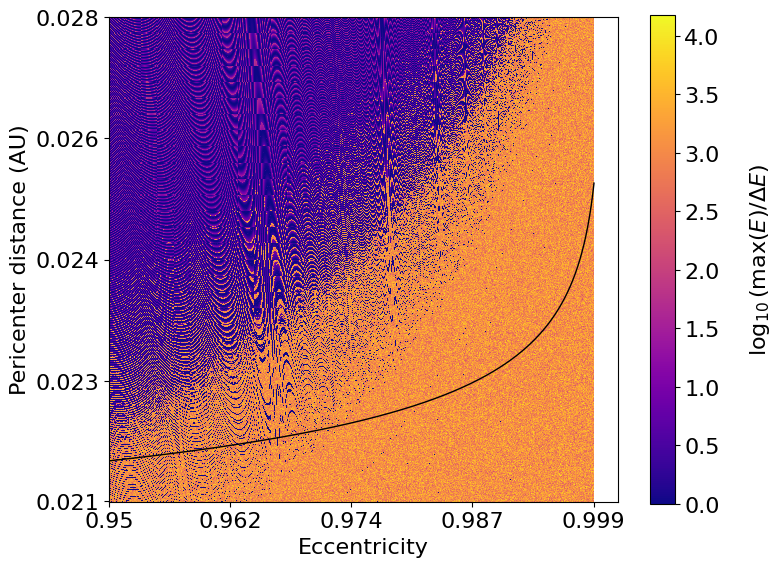

In [75]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(8, 6))
im = plt.imshow(np.log10(data.T), cmap='plasma', interpolation='nearest', origin='lower')  # You can change the cmap and interpolation
cbar = plt.colorbar(im)  # Create the colorbar
cbar.set_label(r'$\log_{10}(\text{max}(E) / \Delta E)$', rotation=90, labelpad=20)  # Set the label for the colorbar


x = np.linspace(1, 1000, 1000).astype(int)


r_p_crit = 0.0206 * (1.22 + Omega_s / time_unit)**(-0.59) * (0.56)**0.11 * ((1 - e) / 0.02)**(-0.135) * 1.6 * (1e3 * sim.particles[1].m / sim.particles[0].m)**(-0.297) * (sigma / epsilon)**(0.054)
r_p_crit = r_p_crit - rp[0]

y = r_p_crit * 1 / (np.max(rp0) / 1000)


plt.plot(x, y, lw=1, c='black')

x_ticks = np.linspace(0, N-1, 5).astype(int)  # 5 evenly spaced ticks on the x-axis
y_ticks = np.linspace(0, N-1, 5).astype(int)  # 5 evenly spaced ticks on the y-axis
plt.xticks(ticks=x_ticks, labels=[str(np.round(e[i], 3)) for i in x_ticks])  # You can customize labels as needed
plt.yticks(ticks=y_ticks, labels=[str(np.round(rp[i], 3)) for i in y_ticks])
plt.xlabel("Eccentricity")
plt.ylabel("Pericenter distance (AU)")



plt.tight_layout()
plt.savefig("Map heatmap.png", dpi=150)

np.float64(83.97049391569956)

In [7]:
r_tide = sim.particles[1].r * (sim.particles[0].m / sim.particles[1].m)**(1/3)
eta = rp0 / r_tide
Omega_peri = ((sim.particles[0].m + sim.particles[1].m) / rp0**3)**(1/2)
omega = 2134.79566108347#1932.1600985957584 # frequency of modes, in rby^-1
Rp = sim.particles[1].r


z = 2**(1/2) * sigma / Omega_peri
T = 11.788010#get_T(Q=0.56, z=z, eta=eta) * sigma/epsilon
print("exp:", np.exp(-2*z/3))
#Rp = sim.particles[1].r

#dE_alpha = (sim.G * sim.particles[1].m**2/Rp) * eta**(-6)*T
dE_alpha = (sim.G * sim.particles[0].m**2 * Rp**5 * T / rp0**6)
print((-dE_alpha / EB0)**(1/2))

exp: 0.00035190921583077916
0.1720294484456284


In [6]:
#sim.particles[1].params["td_EB0"]
sim.energy()

-0.0003799961231593904

In [5]:
import numpy as np
from matplotlib import pyplot as plt

def run_DT_map(P_hat_0, dP_hat_1, gamma_hat, a0, e0):
    
    a = a0
    e = e0
    
    amplitude_last = 0
    
    da = ((2/3)*dP_hat_1/P_hat_0)**(1/2)
    E_tilde_last = 0
    E_B_tilde_last = -1
    
    E_tilde_max = 0
    dE_tilde_0 = 0

    for i in range(1000):

        # update map
        
        dE_tilde = abs(amplitude_last + da)**2 - abs(amplitude_last)**2
        
        if abs(amplitude_last)**2 >= E_tilde_max:
            E_tilde_max = abs(amplitude_last)**2
        
        if i == 0:
            dE_tilde_0 = dE_tilde
        
        E_tilde = E_tilde_last + dE_tilde
        E_B_tilde = E_B_tilde_last - dE_tilde

        P_hat_new = P_hat_0 * (-1 / E_B_tilde)**(3/2)
        a_next = (amplitude_last + da)*np.exp(-complex(gamma_hat,1)*P_hat_new)

        E_ratio = E_B_tilde_last / E_B_tilde
        

        a = E_ratio * a
        e = (1 - (1/E_ratio)*(1-e**2))**(1/2)
        
        E_tilde_last = E_tilde
        E_B_tilde_last = E_B_tilde
        amplitude_last = a_next
        
    return a, e, E_tilde_max / dE_tilde_0, dE_tilde_0, da

def get_T(Q, z, eta):
    K = 2*z**(3/2)*eta**(3/2)*np.exp(-2*z/3)*(1 - np.pi**(1/2)/(4*z**(1/2)))/(15**(1/2))
    
    print("Eta_pow", eta**(3/2))
    return 2*np.pi**2 * Q**2 * K**2

def map_params(e, r_p, M, M_p, R):
    r_tide = R * (M / M_p)**(1/3)
    eta = r_p / r_tide
    Omega_peri = ((M + M_p) / r_p**3)**(1/2)
    omega = 2134.79566108347#1932.1600985957584 # frequency of modes, in rby^-1

    
    z = 2**(1/2) * omega / Omega_peri
    T = get_T(Q=0.56, z=z, eta=eta)

    print(T)

    dP = (6*np.pi*(omega / Omega_peri) / (1-e)**(5/2)) * (M_p/ M)**(2/3)  * eta**(-5) * T
    P = 2*np.pi * (omega / Omega_peri)  / (1-e)**(3/2)
    
    return P, dP

